<a href="https://colab.research.google.com/github/hazem-antar/Data-Science/blob/main/Practical_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made by: Hazem Antar Taha (H.Antar@nu.edu.eg)
<br>
Under Supervision of : Pof. Alla Anohina-Naumeca (alla.anohina-naumeca@rtu.lv)

$\mathrm{\large Riga\;Technical\;University}$


$\mathrm{\large (DSP332): Fundamentals\;of\;Artificial\;Intelligence}$


$\mathrm{\huge Second\;Practical\;Assignment}$

**Introduction**

This notebook discusses the analysis, visualization, and development of different types of machine learning algorithms on a small-sized dataset of Penguins. In the first part, the used dataset will be wrangled and cleaned from null, duplicated, and outliers values. Then, every feature in the dataset will be explored thoroughly and the correlation between different features will help unfold even the tiniest details. Using the current knowledge, some features might need to be disposed of before moving on to the next phase. 
<br>
In the second part, two different clustering Machine Learning (ML) algorithms will be developed to discover the building structure of the dataset (different penguins' species, gender, and where they live) only by analyzing measurable features.
Lastly, in the third part, three different classification machine learning algorithms will be trained to preciously predict the type of penguin species given all other features in the dataset.

**Information about the dataset**

Palmer Archipelago (Antarctica) Penguin Data is a dataset that was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.
<br>
<br>
**License & citation:**
<br>


*   Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.
*   Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081






**Meet the penguins**

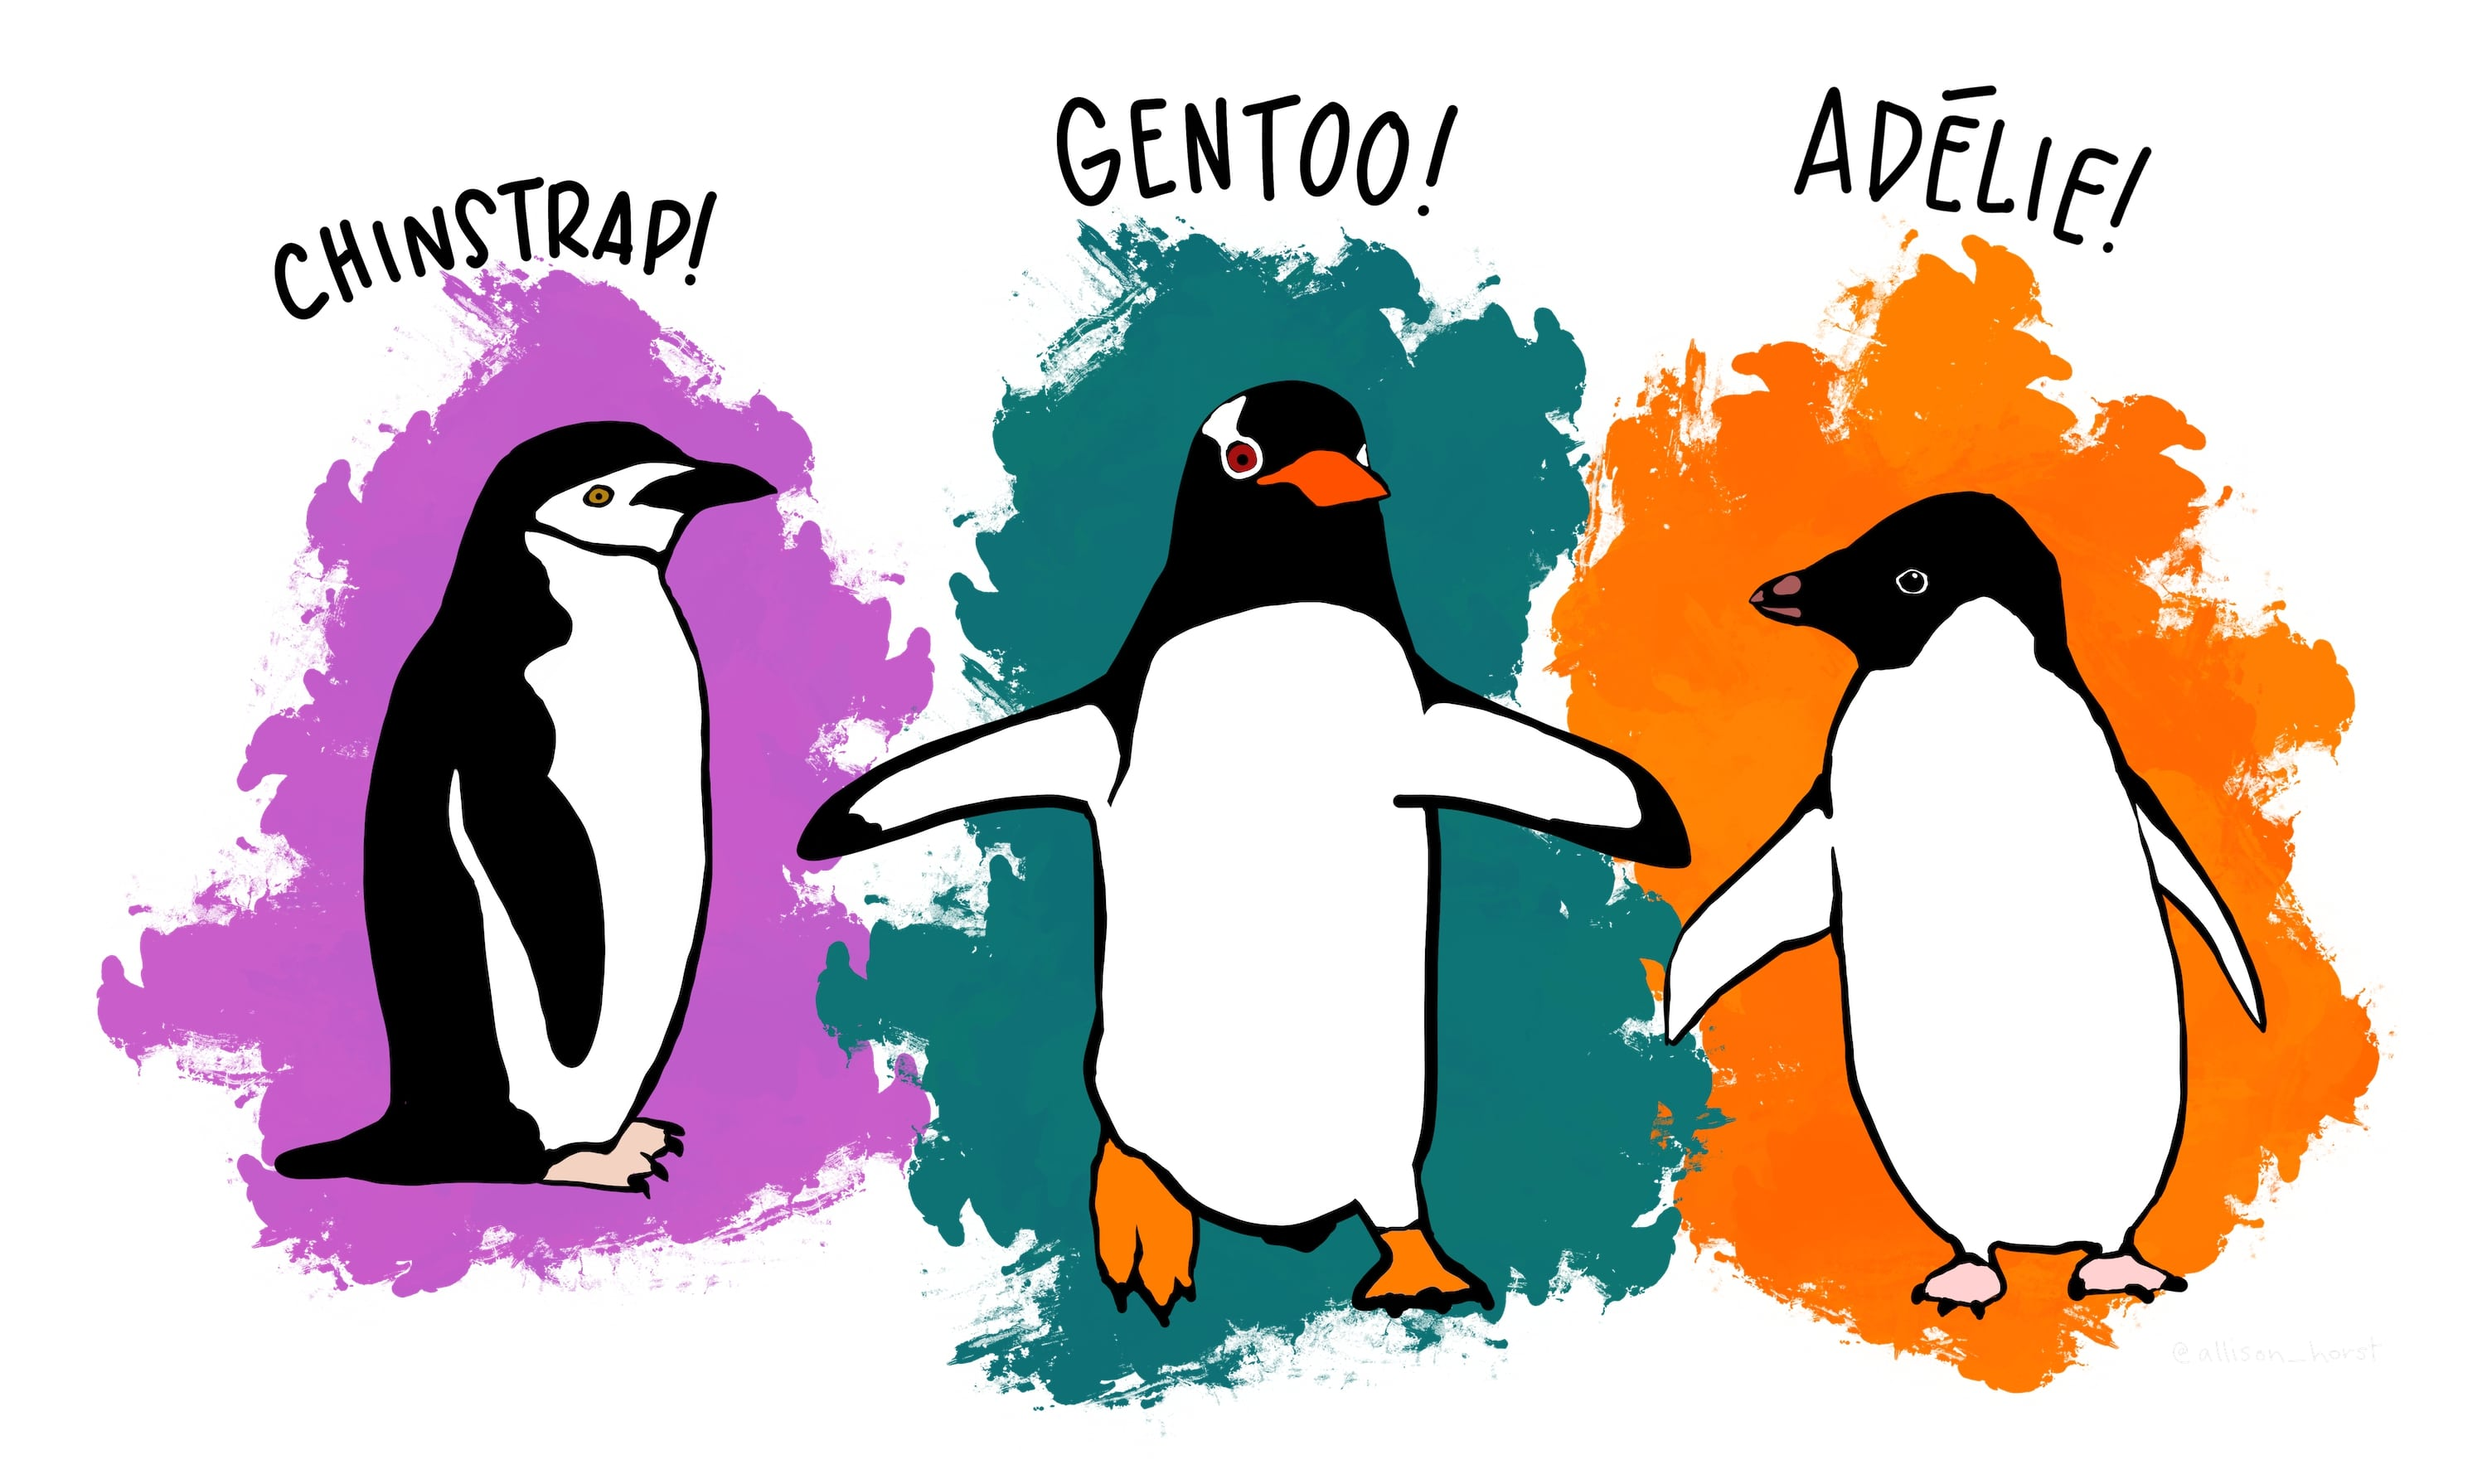

# Part 1 – Pre-processing/Exploring the data

In [1]:
# Importing essential data analysis libraries
from google.colab import files  # Used in uploading the CSV file into Colab
import io  # Used in converting the CSV file into Pandas Dataframe
import pandas as pd
import numpy as np
import math
import warnings

In [2]:
# Suppressing spamming warning messages
warnings.filterwarnings("ignore")

In [3]:
# Uploading the dataset CSV file
uploaded = files.upload()

Saving data_on_penguins.csv to data_on_penguins.csv


In [4]:
# Converting the dataset into Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['data_on_penguins.csv']))

## Exploring Dataset Content

In [5]:
# Getting the shape of the Dataframe (rows, columns)
df.shape

(344, 7)

In [6]:
# Summary information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   specie title       344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# Snippet of the Dataframe
df.head()

,specie title,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
# Renaming the (specie title) to (specie) for simplicity
df.rename(columns={"specie title": "specie"}, inplace = True)

In [9]:
# Extracting the names of the categorical and numerical features for later use
categorical_features = df.select_dtypes(include='object').keys()
numerical_features = df.select_dtypes(include="number").keys()

In [10]:
# Show unique values for each categorical feature
for feature in categorical_features:
  print(feature, ":", df[feature].unique())

specie : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['MALE' 'FEMALE' nan '.']


Notice that feature “sex” has values of “MALE”, “FEMALE”, “nan”  and “.”
<br>"."  values should be replaced with Null as they do not represent any meaningful information.

In [11]:
# Replacing every occurance of value "." in the "sex" feature to "NaN" 
df["sex"].replace({".":np.nan}, inplace=True)

In [12]:
# Showing the aggregate sum of "NaN" values for every feature 
df.isnull().sum()

specie                0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
# Showing every row that contain any "NaN" value
df[df.isna().any(axis = 1)]

,specie,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


After analyzing the number of null values and were they reside, the following was concluded:


*   Objects number 3 and 339 shall be dropped as they contain almost all Null values making them useless and perhaps misleading if it was attempted to fix them.
*   The rest of objects (counted 9) contain only Null values in the “sex” feature. Those missing values are approximately 3% of the whole “sex” values making it inefficient to develop a machine learning model to predict them. An optimal choice would be to fill them with the mode of the other 97% of the values.


In [14]:
# Dropping rows with indices (0) and (339)
df.drop([3,339], axis=0, inplace=True)  
df.reset_index(drop=True, inplace=True)  # Resetting the index count to clear gaps in the Dataframe

In [15]:
# Filling "NaN" values in the "sex" feature with the first mode 
df["sex"].fillna(df["sex"].mode()[0], inplace=True)

In [16]:
# Showing the aggregate sum of "NaN" values for every feature 
df.isnull().sum()

specie               0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
# Checking if there are any duplicate values
df.duplicated().any()

False

In [18]:
# Removing outliers

for f in numerical_features:  # For every numerical feature

  for spe in df["specie"].unique():    # For every type of species

    df_spe = df[df["specie"] == spe]   # Filter objects of that type from the Dataframe 
    Q1 = df_spe[f].quantile(0.25)      # Calculate the first quartile value of feature (f) for the filterd objects 
    Q3 = df_spe[f].quantile(0.75)      # Calculate the third quartile value of feature (f) for the filterd objects
    IQR = Q3 - Q1                      # Calculate the IQR of feature (f) for the filterd objects
    upper_limit = round(Q3 + 1.5 *IQR, 1)   # Calculate the upper limit for valud objects
    lower_limit = round(Q1 - 1.5 * IQR, 1)  # Calculate the lower limit for valud objects
    to_remove = df_spe[(df_spe[f] <= lower_limit) | (df_spe[f] >= upper_limit)]  # Filter outliers objects based on the limits
    df.drop(to_remove.index, axis = 0, inplace = True) # Drop the outliers from the Dataframe

df.reset_index(drop=True, inplace=True)  # Resetting the index count to clear gaps in the Dataframe

In [19]:
# Summary information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   specie             334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.4+ KB


## Statistics and Visualization

In [20]:
# Importing essential data visualization libraries
import matplotlib.pyplot as plt  # Essintial ploting library
import seaborn as sns            # More professional plotting with extra styles and features

In [21]:
# Setting plotting environment characteristics
custom_params = {"axes.spines.right": False, "axes.spines.top": False} # Remove Top and Right borders from plotting
sns.set_theme(style="ticks", rc=custom_params) # Setting the plotting style "ticks"
plt.rcParams['figure.figsize'] = [13, 7]       # All plots will have a defult size of 13 x 7 inches

In [ ]:
# Dictionary for mapping feature names into a more adequate form for representation 
numerical_labels = {"culmen_length_mm":"Culmen Length (mm)", "culmen_depth_mm":"Culmen Depth (mm)",
                    "flipper_length_mm":"Flipper Length (mm)", "body_mass_g":"Body Mass (g)"}

In [ ]:
# Presenting statistical measures about Dataframe (including all categorical features)
df.describe(include='all')

,specie,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,334
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,147,165,NaN,NaN,NaN,NaN,170
mean,NaN,NaN,43.820060,17.103293,200.799401,4196.706587,NaN
std,NaN,NaN,5.386569,1.948054,14.009173,796.218780,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2850.000000,NaN
25%,NaN,NaN,39.200000,15.500000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.250000,17.300000,197.000000,4025.000000,NaN
75%,NaN,NaN,48.475000,18.600000,213.000000,4750.000000,NaN


Note the following:


*   The below command declares a 3X1 (rows, column) figure of size 9X9 inches and returns a figure object and 3 vertical axes. The figure object is used to adjust the image parameters like size and fitting and the axes are used one at a time to plot graphs on them. 
```
figure, axes = plt.subplots(3, 1, figsize=(9, 9))
```
<br>

*   Flattening the axes makes it easier to index and treat them it like an array that is why we use the following command:
```
axes = axes.ravel()  
```
<br>

*   Zipping the axes array with the features array you want to plot makes it easier to iterate over them and access one axis with one feature and plot the feature on the axis at each iteration
```
for fet, ax in zip(features, axes):
```

*   In seaborn plots, the "hue" parameter is used for grouping variables upon their value of a specific feature you choose, it will produce points with different colors for every group. More information can be found in the functions documnetion.
```
sns.countplot(x=fet, hue="specie", data=df, ax=ax)
```


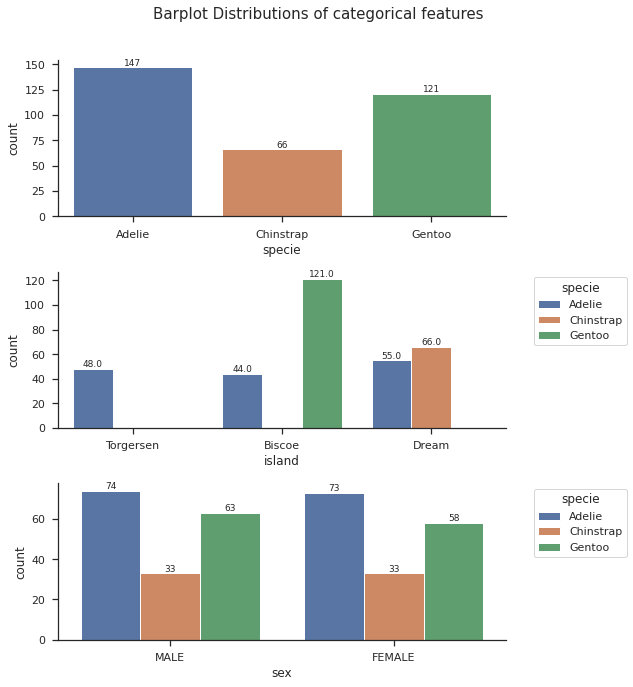

In [ ]:
# Creating histograms (countplot) for categorical features

fig1, axes1 = plt.subplots(3, 1, figsize=(9, 9))  # Create a 3X1 figure 
axes1 = axes1.ravel()                             # Flattening the axes 

for fet, ax in zip(categorical_features, axes1):  # Zipping the categorical features labels with the axes

  if fet == "specie":  # Feature "specie" does not need to have a hue='specie' unlike the rest
    g = sns.countplot(x=fet, data=df, ax=ax)      # Plotting the histogram graph on the specified axis

  else: 
    g = sns.countplot(x=fet, hue="specie", data=df, ax=ax)  # Plotting the histogram graph on the specified axis
    sns.move_legend(g, bbox_to_anchor=(1.05, 1), loc='upper left', title='specie')

  for p in g.patches:  # Accessing every bar in the graph to put percentages over them
    
    if np.isnan(p.get_height()): continue   # Skip if the bar does not exists
    txt = str(p.get_height())               # Get the height of the bar
    txt_x = p.get_x()+ (p.get_width()/2)    # Text horizontal postion = bar horizontal start position + half bar width
    txt_y = p.get_height()                  # Text vertical postion = bar vertical start position
    g.text(txt_x, txt_y, txt, fontsize=9,
           horizontalalignment = "center", verticalalignment = "bottom")  # Rendering the percentage text in the specified coordinates

plt.suptitle('Barplot Distributions of categorical features',
             verticalalignment= 'baseline', fontsize = 15,  y=1.04)       # Putting a common figure title for all axes
fig1.tight_layout()   # Tight fit the graphs inside the figure  
plt.show()            # Render the figure  

From the above figure the following can be deduced:


*  “Adelie” penguins appear the most in the dataset followed by “Gentoo” and then “Chinstrap” which has the least count (only 20%)
*  “Torgersen Island” has penguin of type “Adelie” only
*  “Biscoe” Island has double the amount of “Gentoo” penguins than it has of “Adelie” while it does not have any “Chinstrap” penguins
*  “Dream” Island has nearly similar amount of types “Adelie” and “Chinstrap” with no existence of type “Gentoo”
*  The count of males and females of all three types are approximately equal with some bias towards the males.



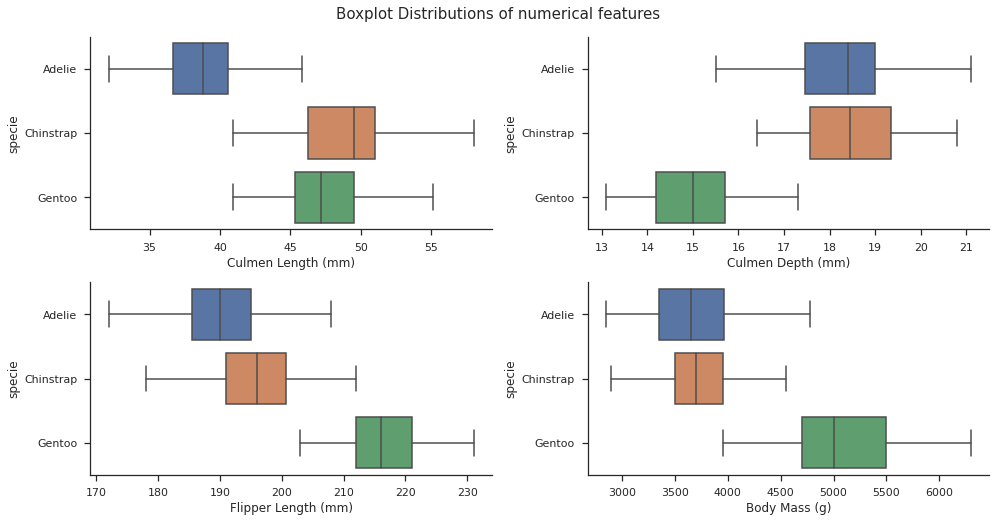

In [ ]:
# Creating the Boxplots for numerical features

fig2, axes2 = plt.subplots(2, 2, figsize=(14, 7))  # Create a 2X2 figure 
axes2 = axes2.ravel()                              # Flattening the axes

for col, ax in zip(numerical_features, axes2):     # Zipping the numerical features labels with the axes

  sns.boxplot(x=col, y="specie", data=df, orient="h", ax=ax)  # Plotting the boxplot graph on the specified axis
  ax.set_xlabel(numerical_labels[col])     # Changing the x-axis label for the created graph

plt.suptitle('Boxplot Distributions of numerical features', verticalalignment= 'baseline', fontsize = 15,  y=1.01)  # Putting a common figure title for all axes
fig2.tight_layout()   # Tight fit the graphs inside the figure  
plt.show()            # Render the figure  

From the above figure the following can be deduced:

*  Outliers within species for all measurable features have been eliminated.
*  The range of the distribution (spreedness) of "Gentoo" specie body mass is large, in contrast to its Flipper Length range of distripution.
*  The culmen length of the “Adelie” species is comparably less than that of the other two species.
*  The median of the culmen length of “Chinstrap” species is slightly bigger that of the “Gentoo”.
*  “Gentoo” species has significantly large mean of body mass than the other two species.

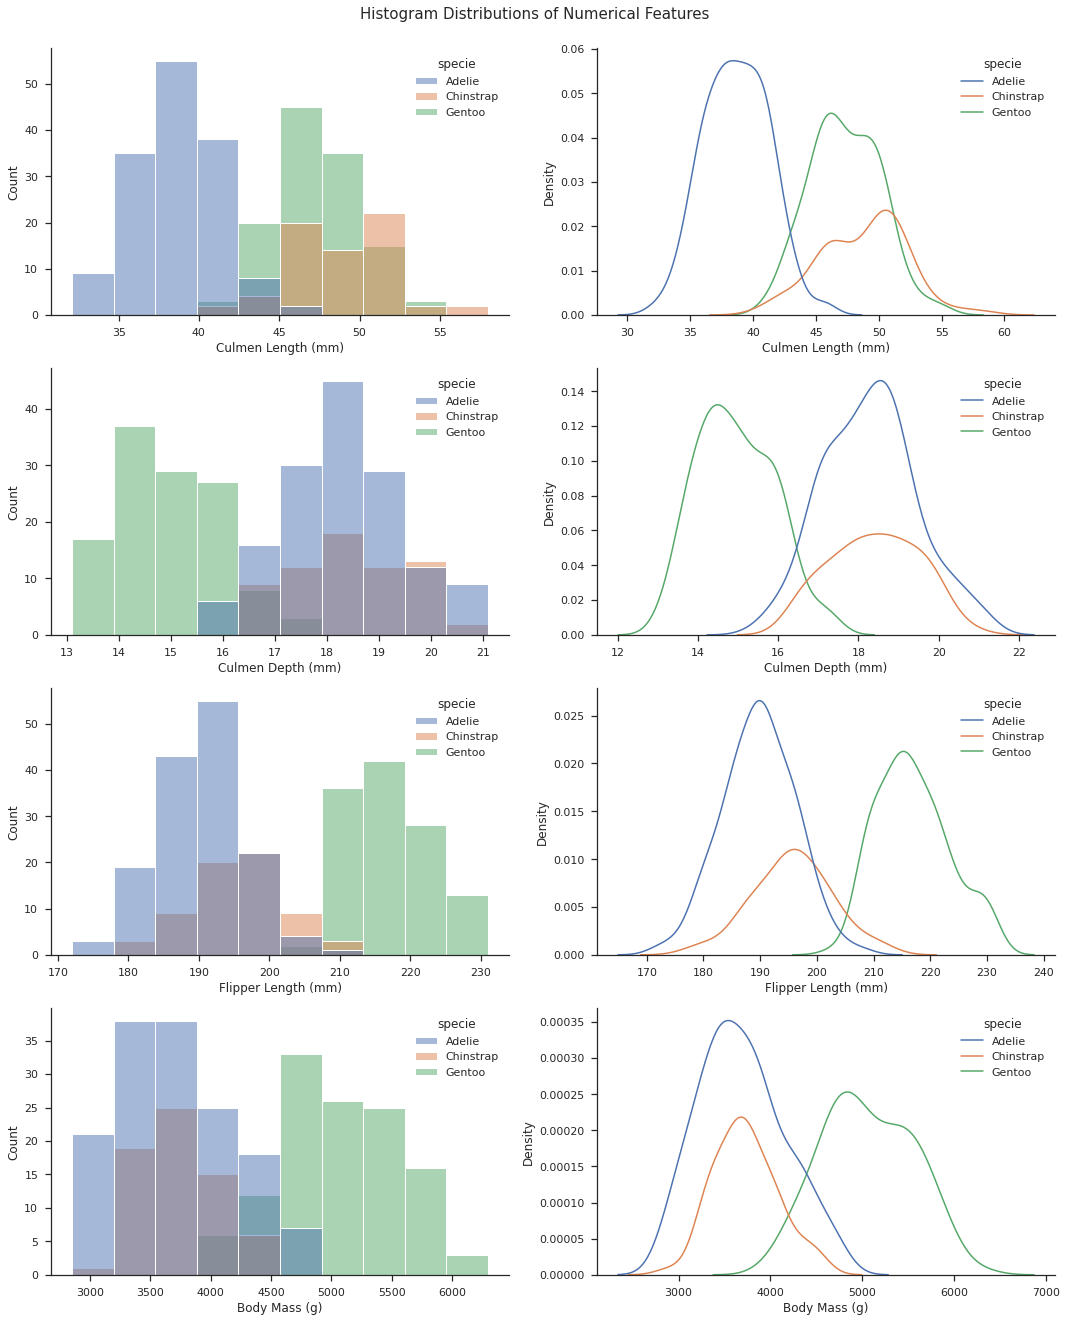

In [ ]:
# Creating histograms (distplot) for numerical features

fig3, axes3 = plt.subplots(4, 2, figsize=(15, 18))  # Create a 4X2 figure 
axes3 = axes3.ravel()  # Flattening the axes
double_numerical_features = [val for val in numerical_features for _ in (0, 1)]  # Repeating every combination value in the list twice as it will be plotted twice
hist = True   # Flag for switching between the type of graph to be plotted on each axis

for col, ax in zip(double_numerical_features, axes3):  # Zipping the numerical features labels with the axes

  if hist:
    sns.histplot(data=df, x=col, hue="specie", ax=ax)  # Plotting the histogram on the specified axis
    ax.set_xlabel(numerical_labels[col])  # Changing the x-axis label for the created graph
    hist = False  # Flip the flag value

  else:
    sns.kdeplot(data=df, x=col, hue="specie", ax=ax)  # Plotting the kde-plot graph on the specified axis
    ax.set_xlabel(numerical_labels[col])  # Changing the x-axis label for the created graph
    hist = True   # Flip the flag value

plt.suptitle('Histogram Distributions of Numerical Features', verticalalignment= 'baseline', fontsize = 15,  y=1.01)  # Putting a common figure title for all axes
fig3.tight_layout()   # Tight fit the graphs inside the figure  
plt.show()   # Render the figure  

From the above figure the following can be deduced:


* The same conclusions from the Boxplots can be confirmed from here.
*  “Gentoo” penguins have smaller Culmen Depth than the other species.
*  “Chinstrap” and “Adelie” are mostly alike in nearly all features except Column Length where “Chinstrap” has longer Culmen. 

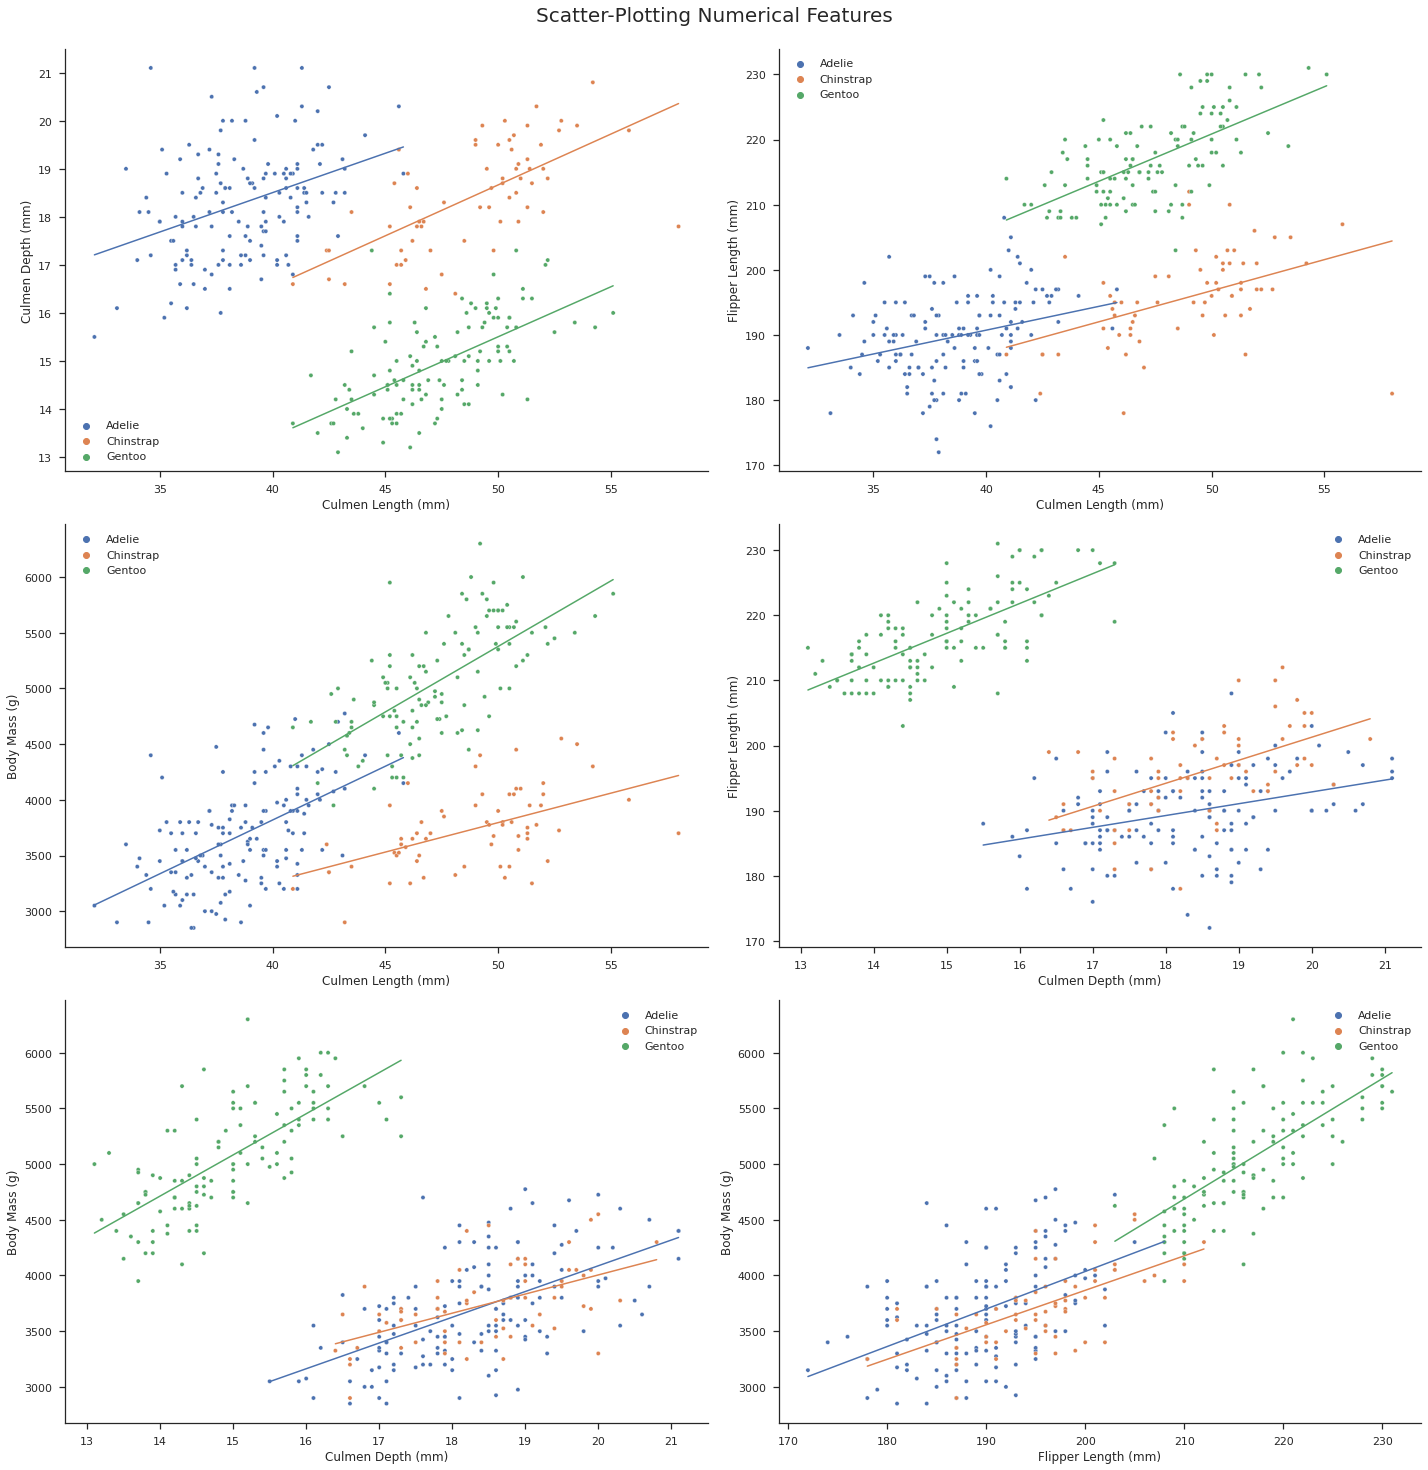

In [ ]:
# Creating scatterplots and heatmap for numerical features

import itertools   #Used in finding all the possible combinations of pairs of features

fig5, axes5 = plt.subplots(3, 2, figsize=(20, 20))   # Create a 3X2 figure 
axes5 = axes5.ravel()                                # Flattening the axes
all_combinations = itertools.combinations(numerical_features, 2)  # Calculating all the possible combinations of 2 features

for c, ax in zip(all_combinations, axes5):

  plot = sns.scatterplot(data = df, x = c[0], y = c[1],
                          hue='specie', size= 11, ax=ax)          # Plotting the scatterplot graph on the specified axis

  # This part is for finding the best-fit line for each species points on the graph
  for spe in ['Adelie', 'Chinstrap', 'Gentoo']: 
    c_0 = df.loc[df["specie"] == spe, c[0]]      # Filter data objects by certain species "spe" and by feature "C[0]"
    c_1 = df.loc[df["specie"] == spe, c[1]]      # Filter data objects by certain species "spe" and by feature "C[0]"
    sns.lineplot(np.unique(c_0), np.poly1d(np.polyfit(c_0, c_1, 1))(np.unique(c_0)), ax=ax)  # np.unique for removing any duplicate and sorting x values

  # This part is for removing garbage legend labels due to a bug in the Seaborn function
  h,l = plot.get_legend_handles_labels()   # Retrieving legend handles and  their corresponding labels
  l_2, h_2 = [], []        # Create two lists for storing wanted labels and handels
  for i in range(len(l)):  # Iterate over the labels
    if len(l[i]) > 2:      # if the length of label characters > 2 append the label and its handle to the created lists
      l_2.append(l[i])
      h_2.append(h[i])
  plot.legend(handles=h_2, labels=l_2)    # Plot the legend using the created handles and labels list

  ax.set_xlabel(numerical_labels[c[0]])   # Changing the x-axis label for the created graph
  ax.set_ylabel(numerical_labels[c[1]])   # Changing the y-axis label for the created graph

plt.suptitle('Scatter-Plotting Numerical Features', verticalalignment= 'baseline', fontsize = 20,  y=1.01)  # Putting a common figure title for all axes
fig5.tight_layout()   # Tight fit the graphs inside the figure  
plt.show()   # Render the figure

From the above figure the following can be deduced:


*   Species type can be easily identified by only knowing the “Culmen Length” measure with any of these measures (“Culmen Depth” / “Flipper Length” / “Body Mass”). This fact can be seen from observing the plotting of each of the sets and how the points on the plan are quite separable.
*   it appears that there exists a strong correlation between “Flipper Length” and “Body Mass” which will be made sure of after calculating the correlation matrix.
*   if we consider correlations (within same species objects) we can see that “Culmen Depth” and “Culmen Length” are positively correlated.

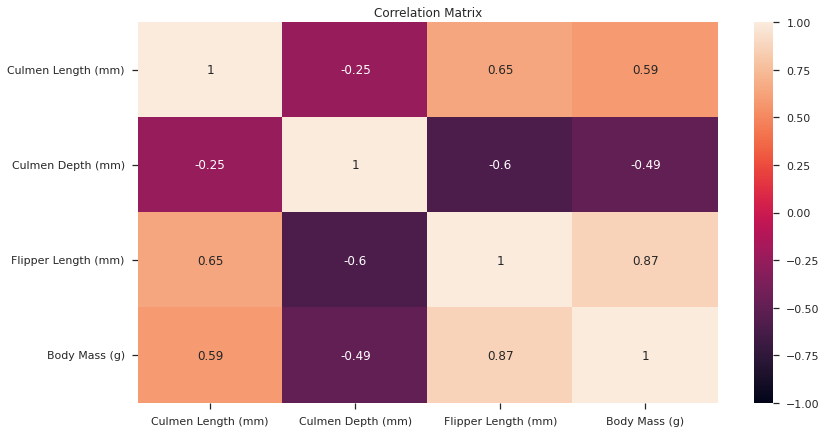

In [ ]:
# Creating correlation matrix for numerical features

corr = df[numerical_features].corr()  # Calculate the correlation between all numerical features

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1,
            xticklabels = numerical_labels.values(),
            yticklabels = numerical_labels.values())  # Plot the correlation on a heatmap

plt.title("Correlation Matrix")  # Add a figure title
plt.show()

As predicted from the scatterplot figure, it is confirmed that there exists a mildly strong correlation between “Body Mass” and “Flipper Length”. This issue will be solved in the next section by dropping the “Flipper Length” feature as it has higher net sum of correlations than that of “Body Mass”.

## Preparing Dataset for Modeling

*   The “Flipper Length” feature will be dropped to solve the correlation problem between “Body Mass” and “Flipper Length".
*   The dataset will be normalized to the same scale so that no attribute can dominate over the other. 
*   One-Hot Encoding will be used to convert categorical features into numerical values to be able to use them to generate machine learning models. The process starts by splitting the feature column into several columns each corresponding a specific value of the feature and only one of the columns can have a value of 1 “True” at a time. First value for each categorical feature will be dropped out because it is the same as giving zeros to all other values.


In [22]:
# Copying the categorical features before splitting them for later use
categorical_original = df[categorical_features].copy()

In [23]:
# Applying One-Hot encoding to the categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first = True)

In [24]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,specie_Chinstrap,specie_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
3,36.7,19.3,193.0,3450.0,0,0,0,1,0
4,39.3,20.6,190.0,3650.0,0,0,0,1,1


In [25]:
# Normalizing the Dataframe
df = (df - df.min()) / (df.max() - df.min())

In [26]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,specie_Chinstrap,specie_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,0.270270,0.7000,0.152542,0.260870,0.0,0.0,0.0,1.0,1.0
1,0.285714,0.5375,0.237288,0.275362,0.0,0.0,0.0,1.0,0.0
2,0.316602,0.6125,0.389831,0.115942,0.0,0.0,0.0,1.0,0.0
3,0.177606,0.7750,0.355932,0.173913,0.0,0.0,0.0,1.0,0.0
4,0.277992,0.9375,0.305085,0.231884,0.0,0.0,0.0,1.0,1.0


In [27]:
# Dropping the highly correlated feature
df.drop(["flipper_length_mm"], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   culmen_length_mm  334 non-null    float64
 1   culmen_depth_mm   334 non-null    float64
 2   body_mass_g       334 non-null    float64
 3   specie_Chinstrap  334 non-null    float64
 4   specie_Gentoo     334 non-null    float64
 5   island_Dream      334 non-null    float64
 6   island_Torgersen  334 non-null    float64
 7   sex_MALE          334 non-null    float64
dtypes: float64(8)
memory usage: 21.0 KB


# Part II – Unsupervised learning

In [ ]:
# Importing essential libraries for Clustering

from sklearn.cluster import KMeans                   # Used in developing KMeans Clustering Model
from sklearn.cluster import AgglomerativeClustering  # Used in developing Hierachial Clustering Model
from sklearn.metrics import silhouette_score         # Used in calculating silhouette score
import scipy.cluster.hierarchy as shc                # Used in drawing the Dendogram graph
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer # Used in drawing the silhouette graph and elbow graph

Before starting this phase. Some structural indicative features like “sex”, “species” and “island” shall be removed from the training process as we should not give the model the structures within the data, we want it to find them itself!

In [ ]:
# Selecting non-categorical "numberical" features for the clustering process
df_clustering = df[['culmen_length_mm','culmen_depth_mm', 'body_mass_g']]

### K-Means Clustering:

For this specific model there is only 1 hyperparameter to tune which is the number of clusters (K). Two different evaluation techniques will be performed to decide the optimum number of clusters.

**1) Silhouette Score Analysis:**

In [ ]:
# Calculating Silhouette scores for different number of clusters

for k in range(2,11):   # Repeat over range of clusters from 2 to 6
  KMeans_model = KMeans(n_clusters=k, random_state=0)   # Declaring a KMeans model with K = k, while chossing a seed value (random_state) for consistency
  KMeans_model.fit_predict(df_clustering)     # Fit the model to the Dataframe and predicting the final cluster labels of each object
  score = silhouette_score(df_clustering, KMeans_model.labels_, metric='euclidean')  # Calculating the silhouette score of this model
  print("Average Silhouette score for %d clusters = %0.3f" %(k,score))

Average Silhouette score for 2 clusters = 0.523
Average Silhouette score for 3 clusters = 0.475
Average Silhouette score for 4 clusters = 0.450
Average Silhouette score for 5 clusters = 0.414
Average Silhouette score for 6 clusters = 0.403
Average Silhouette score for 7 clusters = 0.373
Average Silhouette score for 8 clusters = 0.339
Average Silhouette score for 9 clusters = 0.320
Average Silhouette score for 10 clusters = 0.326


Apparently the more we increase in the number of clusters, the less average score we get. This can be also seen in the Silhouette plots in the next figure. The interpretation of that is when the number of clusters increase, the distance between different clusters decresess and the clustral compactness decreases. Although it is in our favor to increase these two parameters are, these scores alone does not tell the big story and are not suffiecent to decide the optimal number of clusters because perhaps the dataset different structures (clusters) are actully a little similar and tight together. In this case, if we took the best average Silhouette for granted, we will be missing the a lot of important details. Therefore, the Silhouette graph has to be examined to see the behaviour of different clusters.

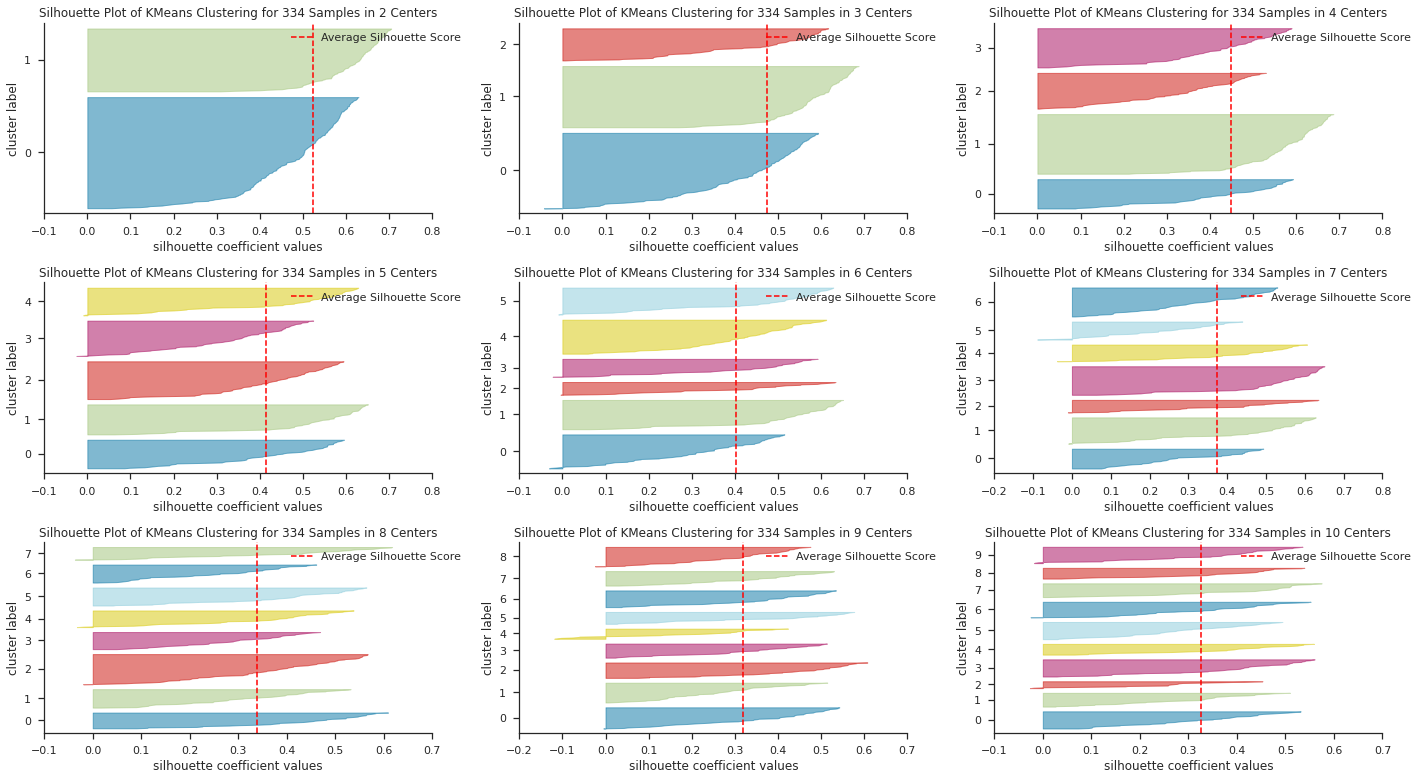

In [ ]:
# Drawing Silhouette graphs for 2 to 10 Clusters

fig, axes = plt.subplots(3, 3, figsize=(20,11))         # Create a 3X3 figure 
axes = axes.ravel()                                     # Flattening the axes
for k, ax in zip(range(2,11), axes):                    # Zipping list of k values with list of axes 
  KMeans_model = KMeans(n_clusters=k, random_state=0)   # Declaring a KMeans model with K = k, while chossing a seed value (random_state) for consistency
  visualizer = SilhouetteVisualizer(KMeans_model, colors='yellowbrick', ax=ax)  # Declare a Silhouette graph visualizer with KMeans_model to be plot on axis (ax)
  visualizer.fit(df_clustering)  # Fit the data to the visualizer
  visualizer.finalize()          # Set the title, label, legend and adjusting the limits of axes
  ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))  # Adjust the location of the legend
fig.tight_layout()   # Tight fit the graphs inside the figure  
plt.show()           # Render the figure 

Looking at the Silhouette analysis in figure 15 it can be deduced the following:


*   K=5 and K = 10 results in a simi-optimal and acceptable clustering; This is because all the clusters are above average silhouette scores and no obvious fluctuations, and the thickness tends to be uniform.
*   The rest of the experiments results in non-acceptable suboptimal clustering; this is due to the fluctuations and nonuniform thickness of the plots.


**2) Elbow Method Analysis**

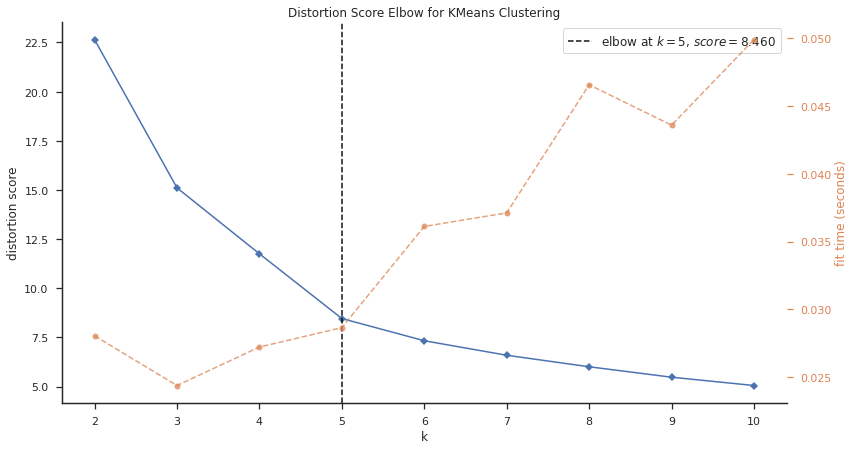

In [ ]:
# Drawing Elbow graph for KMeans model

visualizer = KElbowVisualizer(KMeans(), k=(2,11))   # Instantiate the elbow visualizer with a Kmeans clustering model
visualizer.fit(df_clustering)    # Fit the data to the visualizer
visualizer.show()     # Render the figure 

Looking at the above graph, it is obvious that the deflection point is around at k = 5. This result confirms our deduction form the Silhouette score analysis.
<br>
In order to test the accuracy of these results, a 3D Scatterplot has been made showing all the clustering trials from K=2 and until K=10 while calculating the percentage of the species types to the whole dataset within each cluster as shown below:


With 2 clusters:

Cluster 0  -  Adelie : 100.00 % (147)   Chinstrap : 100.00 % (66)   Gentoo : 0.00 % (0)   

Cluster 1  -  Adelie : 0.00 % (0)   Chinstrap : 0.00 % (0)   Gentoo : 100.00 % (121)   



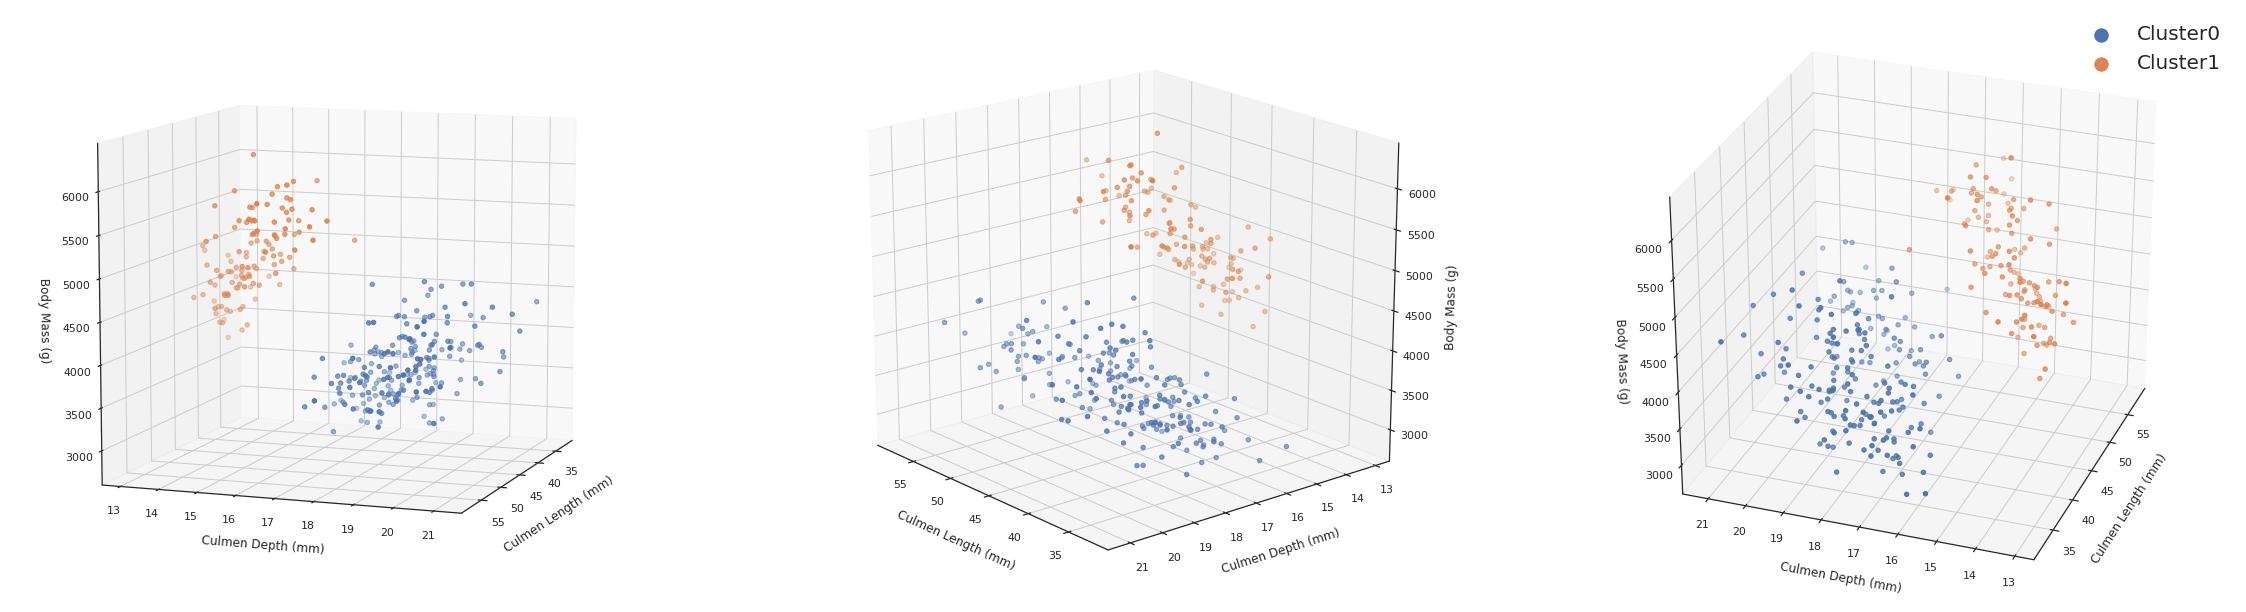

With 3 clusters:

Cluster 0  -  Adelie : 96.60 % (142)   Chinstrap : 10.61 % (7)   Gentoo : 0.00 % (0)   

Cluster 1  -  Adelie : 0.00 % (0)   Chinstrap : 0.00 % (0)   Gentoo : 100.00 % (121)   

Cluster 2  -  Adelie : 3.40 % (5)   Chinstrap : 89.39 % (59)   Gentoo : 0.00 % (0)   



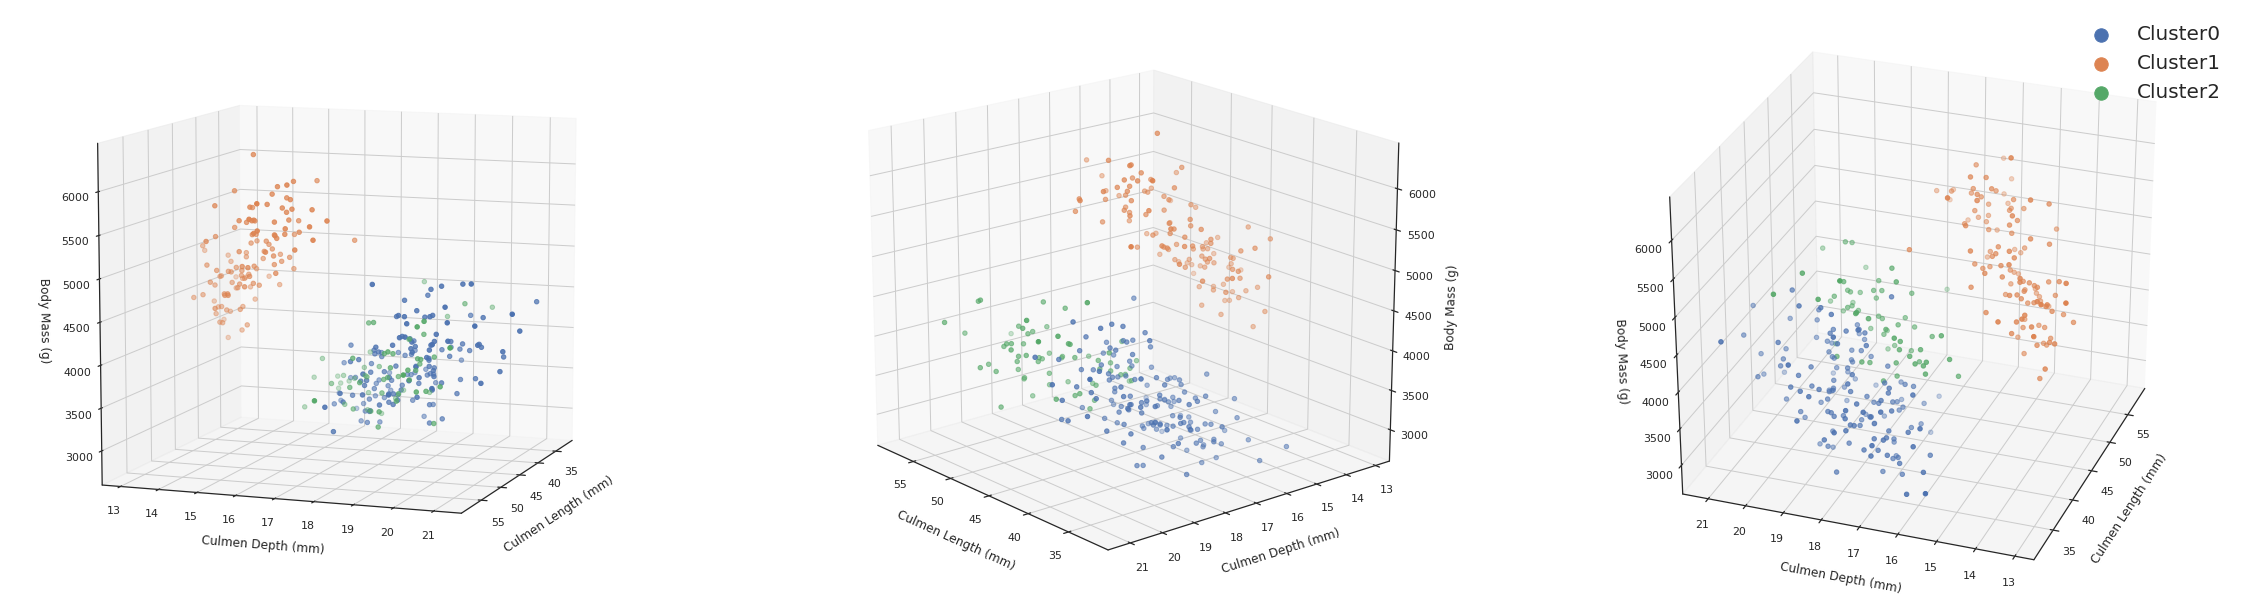

With 4 clusters:

Cluster 0  -  Adelie : 0.68 % (1)   Chinstrap : 89.39 % (59)   Gentoo : 0.00 % (0)   

Cluster 1  -  Adelie : 0.00 % (0)   Chinstrap : 0.00 % (0)   Gentoo : 100.00 % (121)   

Cluster 2  -  Adelie : 49.66 % (73)   Chinstrap : 0.00 % (0)   Gentoo : 0.00 % (0)   

Cluster 3  -  Adelie : 49.66 % (73)   Chinstrap : 10.61 % (7)   Gentoo : 0.00 % (0)   



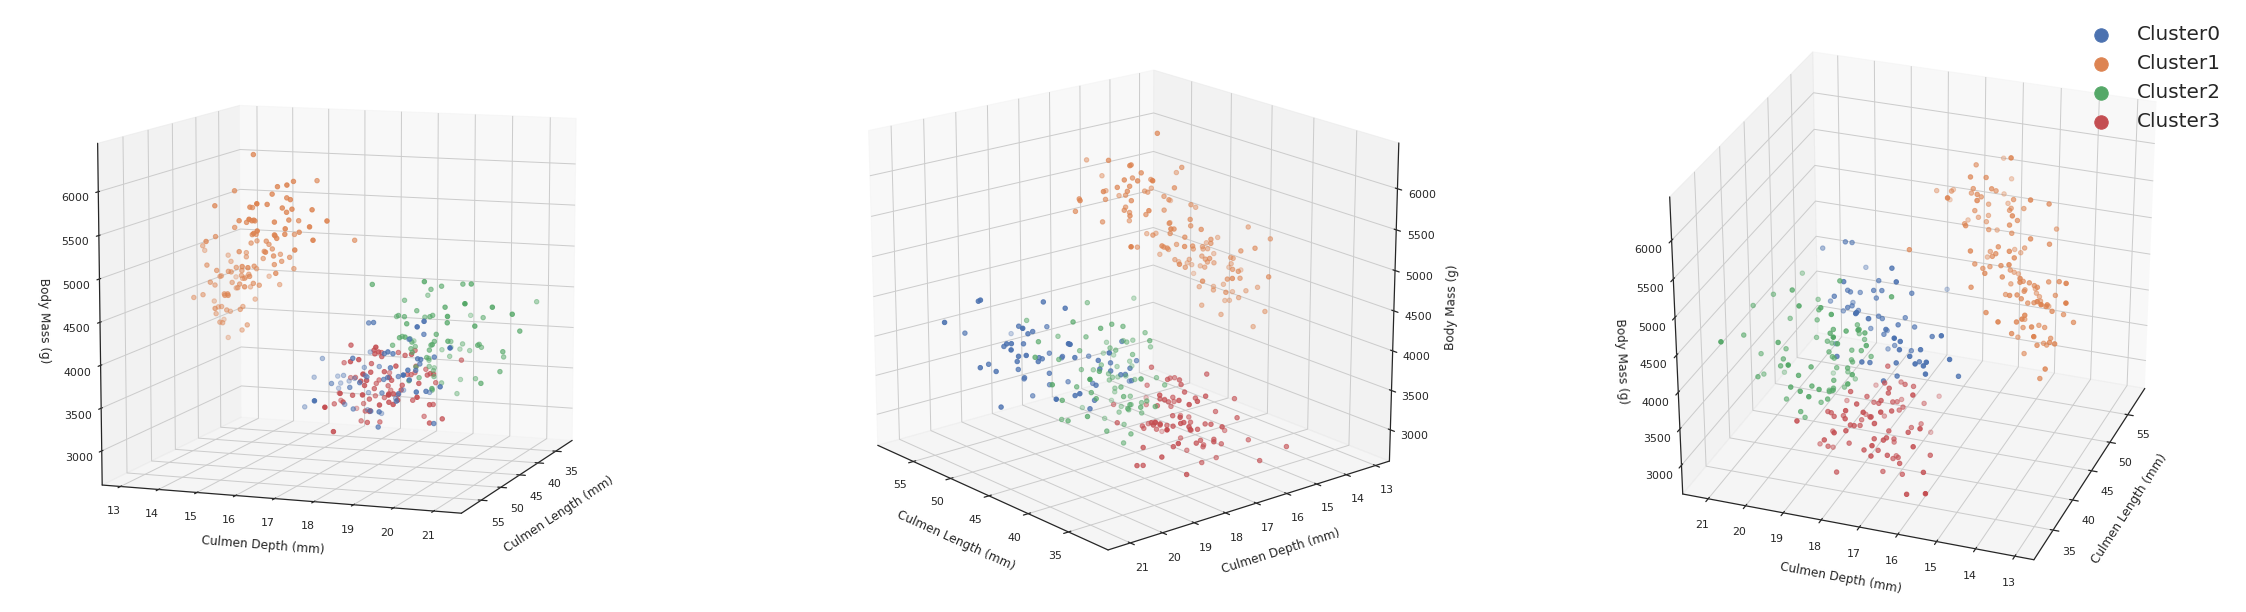

With 5 clusters:

Cluster 0  -  Adelie : 0.68 % (1)   Chinstrap : 89.39 % (59)   Gentoo : 0.00 % (0)   

Cluster 1  -  Adelie : 0.00 % (0)   Chinstrap : 0.00 % (0)   Gentoo : 52.07 % (63)   

Cluster 2  -  Adelie : 48.98 % (72)   Chinstrap : 10.61 % (7)   Gentoo : 0.00 % (0)   

Cluster 3  -  Adelie : 50.34 % (74)   Chinstrap : 0.00 % (0)   Gentoo : 0.00 % (0)   

Cluster 4  -  Adelie : 0.00 % (0)   Chinstrap : 0.00 % (0)   Gentoo : 47.93 % (58)   



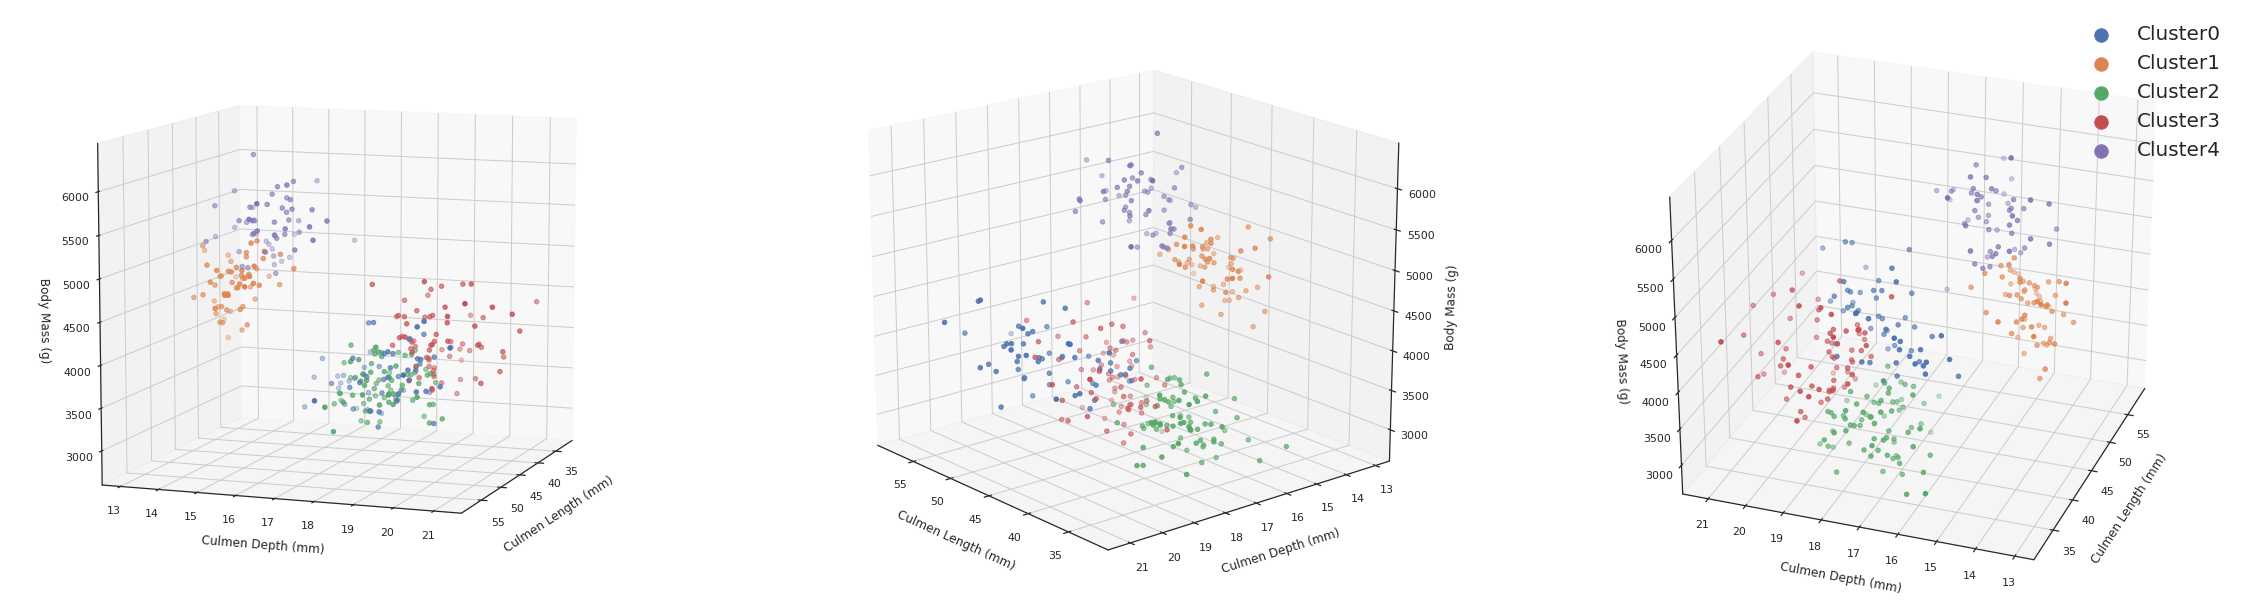

In [ ]:
# Drawing 3D Scatter Plots for showing the clustering output

for k in range(2, 6):  # Repeat over range of clusters from 2 to 6

  KMeans_model = KMeans(n_clusters=k, random_state=0)  # Declaring a KMeans model with K = k, while chossing a seed value (random_state) for consistency
  KMeans_model.fit_predict(df_clustering)              # Fit the model to the Dataframe and predicting the final cluster labels of each object
  fig = plt.figure(figsize=(40,11))                 # Create an empty figure
  orientations = [(20,10), (140,20), (200,30)]      # Different orientations of the 3D graph
  figure_numbers = range(1, len(orientations) + 1)  # List of figure numbers

  for n, (azim, elev) in zip(figure_numbers, orientations):   # Zipping the figure numbers with the 3D graph orientations 

    ax = fig.add_subplot(1, len(orientations), n, projection='3d')    # Adding a 3D subplot number (n) to the figure that has 1Xlen(orientations) sublots
    ax.set_xlabel(numerical_labels["culmen_length_mm"], labelpad=15)  # Setting the x-axis label
    ax.set_ylabel(numerical_labels["culmen_depth_mm"], labelpad=15)   # Setting the y-axis label
    ax.set_zlabel(numerical_labels["body_mass_g"], labelpad=15)       # Setting the z-axis label
    ax.azim = azim  # Setting the azimuth angle of the 3D graph
    ax.elev = elev  # Setting the elevation angle of the 3D graph

    for i in range(k):  # For every cluster 
      ax.scatter(categorical_original["culmen_length_mm"][KMeans_model.labels_==i],
                 categorical_original["culmen_depth_mm"][KMeans_model.labels_==i],
                 categorical_original["body_mass_g"][KMeans_model.labels_==i],
                 label='Cluster'+str(i))   # Filter the dataset objects with the specific cluster label and Scatterplot them

  counts = [{"Adelie":0,"Chinstrap":0,"Gentoo":0} for i in range(k)]  # For every cluster, initialize a dictionary to store the count of species belonging to it

  for i in range(len(categorical_original)):  # For every object in the dataframe 
    cluster_number = KMeans_model.labels_[i]   # Get the predicted cluster label of the object 
    species_name = categorical_original["specie"][i]    # Get the species type of the object 
    counts[cluster_number][species_name] +=1   # Append 1 to the specific cluster dictionary at that species type 

  print("With %d clusters:\n" %(k))
  
  for i in range(k):   # For every cluster 

    print("Cluster %d" %(i), end ="  -  ")

    for spe in counts[i]:  # For every species in the cluster dictionary

      spe_count_dic = counts[i][spe]  # Get the count of the species from the dictionary
      spe_count_df = categorical_original["specie"].value_counts()[spe]  # Get the total count of species from the dataframe
      print("%s : %0.2f" %(spe, spe_count_dic/spe_count_df*100), "%",
            "(%d)" %(spe_count_dic), end ="   ")  # Print the count and persentage of the species inside that cluster to the total count

    print("\n")
  
  plt.legend(fontsize=20, markerscale=3)
  plt.show()

Analyzign the results of K=5 (the potential candidate), the following can be deduced:


*   Clusters 0 and 3 optimally identified the “males” and “female” subcategories respectively of the “Gentoo” species.
*   Cluster 2 optimally identified the “male” of the “Adelie” species.
*   Cluster 1 simi-optimally identified the “female” of the “Adelie” species with few misclassified “Chinstraps”.
*   Cluster 4 optimally identified the “Chinstrap” species but with no idea about the gender structure.

These results are very promising as the model nearly found all the structure within the data, except the distinction of the gender of the “Chinstraps” species as it intersects with itself making it difficult to recognize and sperate.


## Hierarchical Clustering

**Silhouette Score Analysis:**

In [ ]:
# Calculating Silhouette scores for different number of clusters

for n in range(2,11):   # Repeat over range of clusters from 2 to 6
  Hierarchical_MODEL = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')  # Declaring a Hierarchical clustring model with (n) number of clusters
  Hierarchical_MODEL.fit_predict(df_clustering)  # Fit the model to the Dataframe and predicting the final cluster labels of each object
  score = silhouette_score(df_clustering, Hierarchical_MODEL.labels_, metric='euclidean') # Calculating the silhouette score of this model
  print("Average Silhouette score for %d clusters = %0.3f" %(k,score))

Average Silhouette score for 10 clusters = 0.521
Average Silhouette score for 10 clusters = 0.468
Average Silhouette score for 10 clusters = 0.432
Average Silhouette score for 10 clusters = 0.389
Average Silhouette score for 10 clusters = 0.371
Average Silhouette score for 10 clusters = 0.344
Average Silhouette score for 10 clusters = 0.302
Average Silhouette score for 10 clusters = 0.307
Average Silhouette score for 10 clusters = 0.309


Agian, it appears that the more we increase in the number of clusters, the less average score we get. Although it is in our favor to increase the compactness of every clusters and the distance between differnt clusters.These scores alone does not tell the big story and are not suffiecent to decide the optimal number of clusters.

**Dendrogram Analysis**

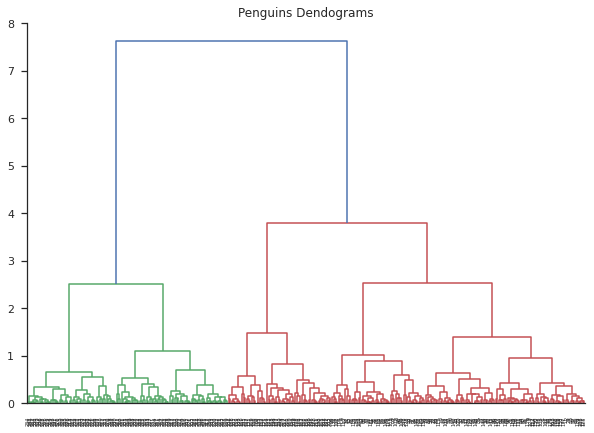

In [ ]:
# Drawing a Dendorgram graph

plt.figure(figsize=(10, 7))  
plt.title("Penguins Dendorgram")
dend = shc.dendrogram(shc.linkage(df_clustering, method='ward'))  # Initializing the Dendorgram analyzer with the dataframe
plt.show()

It can be observed from the above graph that the region representing the largest vertical distance with no horizontal line cutting it has 2 vertical lines representing 2 clusters as shown by line 1 below. This means that this clustering is good because these two clusters are farthest apart from one another, this was clear in the 3D scatterplot of 2 clusters and in that the Silhouette score of 2 clusters was the highest. However, this does not in turn mean that this is the best clustering possible because maybe the dataset still contains undiscovered structures that are close in distance to each other. That is why we can consider the second largest vertical distance which is either 3 or 5 clusters “both are nearly equal length” as shown by line 2 and 3 below.

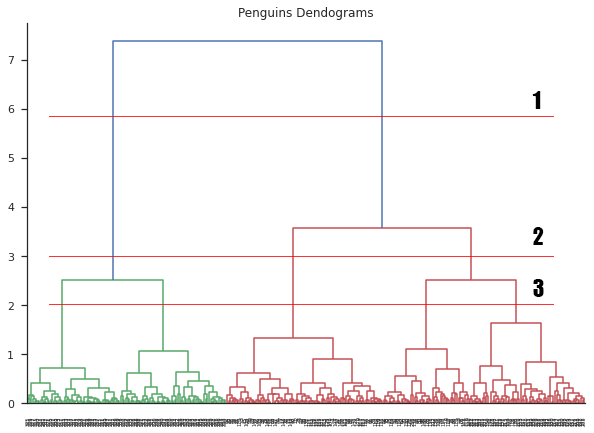

**Elbow Method Analysis**

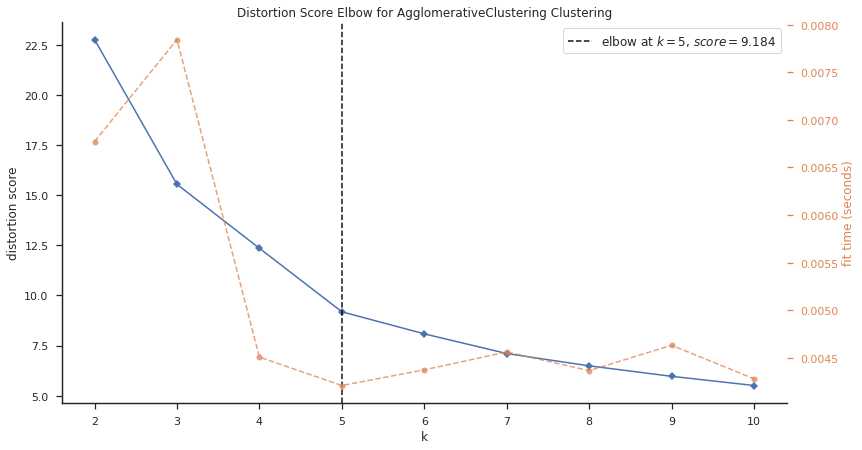

In [ ]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(AgglomerativeClustering(), k=(2,11))
visualizer.fit(df_clustering)        # Fit the data to the visualizer
visualizer.show()  

Looking at the above graph, it is obvious that the deflection point is around at k = 5 (with distortion score of 9.3), along with previous observation all indicate that 5 is the optimal number of clusters!

# Part III – Supervised learning

In this section, three different Supervised Machine Learning models will be used to predict the specific type of penguins given all other features from the dataset as input like where it lives, its gender,  its culmen and flipper measurements, and its body mass.

In [29]:
# Importing essential libraries for Classification

from sklearn.metrics import plot_confusion_matrix, f1_score 
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC  # Used in developing SVM Classifier
from sklearn.neighbors import KNeighborsClassifier   # Used in developing KNN Classifier
from sklearn.neural_network import MLPClassifier   # Used in developing MLP Classifier

In [31]:
# Extracting the model input and output features
x = df.drop(["specie_Chinstrap", "specie_Gentoo"], axis=1)  # Removing species columns from the input features
y = categorical_original["specie"]  # Single output feature containing different classes of species

### K-Nearest Neighbors Classifier

For this specific model, there is only 1 hyperparameter to tune which is (K), therefore it can be tuned by trying all the values of K from 1 to 100 to find the best one that will give the height mean of the F1 score for 5-folds of cross-validation

In [33]:
# Calculate F1 scores of KNN classifiers with differnt (k) values

k_list, scores_list = [], []  # Lists to store the (k) value and the corresponding mean of F1 scores (form cross-validation)
max_mean_score = -1000        # Initializing variable to store the maximum mean of scores 

for k in range(1, 100):       # Repeating for every K from 1 to 100
 
  folds_scores = []           # List to store the F1 scores for every fold of cross-validation  
  k_fold = KFold(n_splits=5)  # Instantiating the KFold function with 5 validation folds 

  for train_indices, test_indices in k_fold.split(df):   # extract the train and test indices of objects for every fold

    KNN_MODEL = KNeighborsClassifier(n_neighbors=k)    # Declaring a KNN model with neighbors = k
    KNN_MODEL.fit(x.iloc[train_indices], y.iloc[train_indices])   # Training the model with the training set
    y_predicted = KNN_MODEL.predict(x.iloc[test_indices])         # Calculating the predictions of the testing set
    score = f1_score(y.iloc[test_indices], y_predicted, average='micro')   # Calculating the micro average F1 score
    folds_scores.append(score)   # Appending this folding F1 score to the list

  mean_score = sum(folds_scores)/len(folds_scores)  # Calculating the mean of scores for the whole folds
  k_list.append(k)  # Appending the (k) value
  scores_list.append(mean_score)    # Appending the corresponding mean of scores

  if mean_score > max_mean_score:   # Store the maximum mean and hence best (k)
    max_mean_score = mean_score
    best_k = k

print("best k is :", best_k)
print("Maximum Mean of F1 scores = ", max_mean_score)

best k is : 3
Maximum Mean of F1 scores =  0.9940298507462686


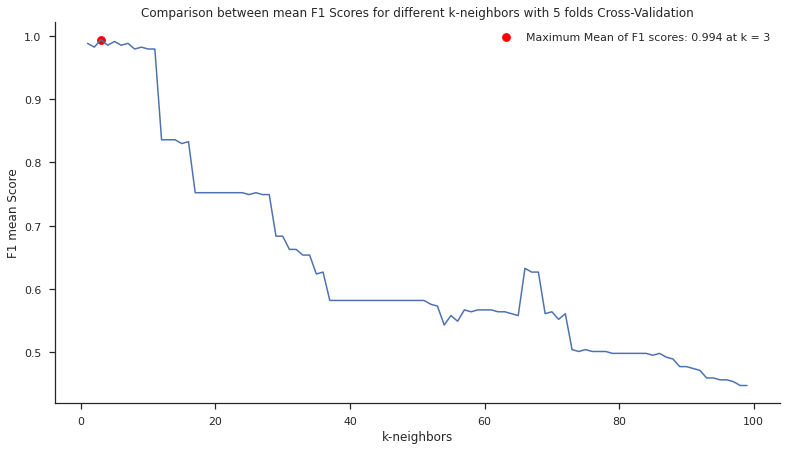

In [ ]:
plt.scatter([best_k], max_mean_score, color = 'red', s = 60, label = "Maximum Mean of F1 scores: %0.3f at k = %d" % (max_mean_score, best_k))
plt.plot(k_list, scores_list)
plt.xlabel('k-neighbors')
plt.ylabel('F1 mean Score')
plt.title('Comparison between mean F1 Scores for different k-neighbors with 5 folds Cross-Validation')
plt.legend()
plt.show()

As can be seen the best k was found to be equal to 3 with a perfect mean of F1 score equal to
0.991. 

In [ ]:
# Rebuilding the model with best (k) and training it using manually created train-test splits

KNN_MODEL = KNeighborsClassifier(n_neighbors=best_k)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, train_size=0.8)
KNN_MODEL.fit(X_train, y_train)

F1 score: 1.000 


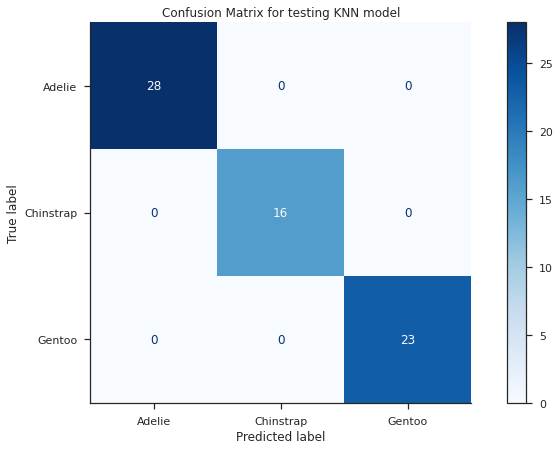

In [ ]:
# Calculating model predictions for testing dataset
predictions = KNN_MODEL.predict(X_test)
 
# model accuracy for X_test 
accuracy = f1_score(y_test, predictions, average='micro')
print("F1 score: %0.3f " % (accuracy))

# creating a confusion matrix
plot_confusion_matrix(KNN_MODEL, X_test, y_test, cmap="Blues") 
plt.title('Confusion Matrix for testing KNN model')
plt.show()

### Support Vector Machine Classifier

In [ ]:
#Grid Search for best hyperparameters over a relatively small search space
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'gamma': [5, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', "poly", "sigmoid"],
              'degree':[1, 2, 3, 4]}
SVC_MODEL = GridSearchCV(SVC(), param_grid, cv = 5, n_jobs=-1, scoring = 'f1_micro')
SVC_MODEL.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4],
                         'gamma': [5, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1_micro')

In [ ]:
print("Best model hyperparameters:", SVC_MODEL.best_params_)
print("Mean F1 score of 10 folds c-v: %0.3f " % (SVC_MODEL.best_score_))

Best model hyperparameters: {'C': 0.1, 'degree': 4, 'gamma': 5, 'kernel': 'poly'}
Mean F1 score of 10 folds c-v: 1.000 


In [ ]:
# Rebuilding the model with best hyperparameters and training it using manually created train-test splits

SVC_MODEL = SVC(C = 0.1, degree = 4, gamma = 5, kernel = 'poly')
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, train_size=0.8)
SVC_MODEL.fit(X_train, y_train)

F1 score: 1.000 


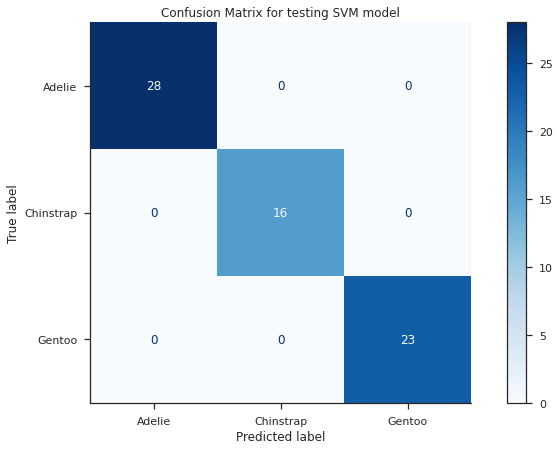

In [ ]:
# Calculating model predictions for testing dataset
predictions = SVC_MODEL.predict(X_test)
 
# model accuracy for X_test 
accuracy = f1_score(y_test, predictions, average='micro')
print("F1 score: %0.3f " % (accuracy))

# creating a confusion matrix
plot_confusion_matrix(SVC_MODEL, X_test, y_test, cmap="Blues") 
plt.title('Confusion Matrix for testing SVM model')

plt.show()

## Neural Network Classifier (Multi-Layer Perceptron)

In [ ]:
#Grid Search for best hyperparameters over a relatively small search space
param_grid = {
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': [(50, ), (100, ), (50,50), (100,100)],
              'max_iter': [50, 100, 500, 1000],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
              'power_t':[0.1, 0.2, 0.4, 0.6, 0.8],
              'alpha':[0.0001, 0.001, 0.01, 0.1]
              }
MLP_MODEL = RandomizedSearchCV(MLPClassifier(), param_grid, n_iter= 1000, n_jobs=-1, scoring = 'f1_micro')
MLP_MODEL.fit(x, y)

RandomizedSearchCV(estimator=MLPClassifier(), n_iter=1000, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 100)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01, 0.1],
                                        'max_iter': [50, 100, 500, 1000],
                                   

In [ ]:
print("Best model hyperparameters:", MLP_MODEL.best_params_)
print("Mean F1 score: %0.3f " % (MLP_MODEL.best_score_))

Best model hyperparameters: {'power_t': 0.4, 'max_iter': 1000, 'learning_rate_init': 0.1, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'identity'}
Mean F1 score: 1.000 


F1 score: 0.985 


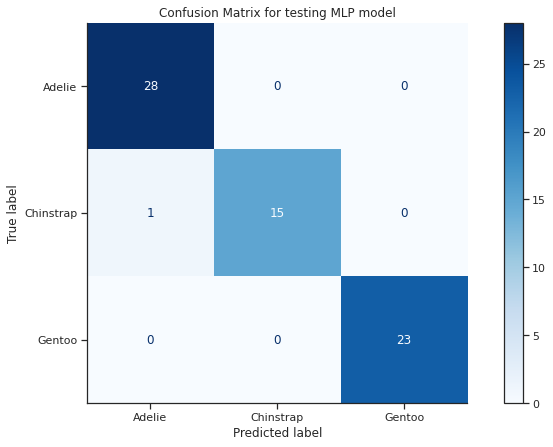

In [32]:
MLP_MODEL = MLPClassifier(power_t = 0.4, max_iter = 1000, learning_rate_init = 0.1,
                          learning_rate = 'invscaling', hidden_layer_sizes = (100,),
                          alpha = 0.0001, activation = 'identity')
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, train_size=0.8)
MLP_MODEL.fit(X_train, y_train)

predictions = MLP_MODEL.predict(X_test)
 
# model accuracy for X_test 
accuracy = f1_score(y_test, predictions, average='micro')
print("F1 score: %0.3f " % (accuracy))

# creating a confusion matrix
plot_confusion_matrix(MLP_MODEL, X_test, y_test, cmap="Blues") 
plt.title('Confusion Matrix for testing MLP model')
plt.show()